# What is Ensemble Learning?
Ensemble learning is a general meta approach to machine learning that combines the predictions of many models to improve predictive performance.

# Decision Trees
It's a versatile tool that can be used in a variety of situations. Both classification and regression problems can be solved with decision trees. The name implies that it use a tree-like flowchart to display the predictions that result from a sequence of feature-based splits. It begins with a root node and finishes with a leaf decision.
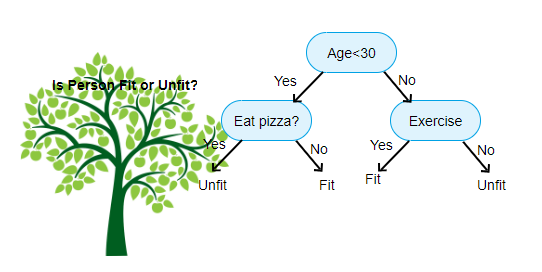

In [ ]:
#@title Importing Libraries
# Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
#@title Importing Data For Classification
# Importing Data For Classification
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"], mnist["target"]
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [ ]:
#@title Importing Data For Regression
# Importing Data For Regression
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Classification
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(X_train[:10000], Y_train[:10000])
#Here We're using only a part of the MNIST dataset as it takes too long to train
decision_tree_clf_preds = decision_tree_clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, decision_tree_clf_preds))

Accuracy:  0.809


In [ ]:
# Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(x_train, y_train)
decision_tree_reg_preds = decision_tree_reg.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, decision_tree_reg_preds))

Mean Absolute Error:  2.7343137254901966


# Random Forests

A random forest is a meta estimator that utilises averaging to enhance prediction accuracy and control over-fitting by fitting a number of decision tree classifiers on various sub-samples of the dataset. If bootstrap=True (default), the sub-sample size is regulated by the max samples parameter; otherwise, the whole dataset is used to build each tree.

In [ ]:
Random_Forest_Classifier = RandomForestClassifier(n_estimators=500, random_state=42)
Random_Forest_Classifier.fit(X_train[:10000], Y_train[:10000])
Random_Forest_Classifier_Preds = Random_Forest_Classifier.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Random_Forest_Classifier_Preds))

Accuracy:  0.953


**See even with less data we got an increase of 15% in accuracy! Random Forests are truly amazing.**

In [ ]:
Random_Forest_Regressor = RandomForestRegressor(random_state=42)
Random_Forest_Regressor.fit(x_train, y_train)
Random_Forest_Regressor_Preds = Random_Forest_Regressor.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, Random_Forest_Regressor_Preds))

Mean Absolute Error:  2.2598627450980397


**In case of regression there is not a huge increase in performance. But, still it's a big improvement over decision trees.**

### So Far We've Seen 2 Algorithms. Decision Trees and Random Forests. Now, Let's See Some More Ensemble Methods.

# Bagging Ensemble

Bagging is a machine learning approach that combines the predictions of many decision trees into a single prediction.

It's also simple to create because it only has a few critical hyperparameters and sensible rules for customising them.

Bagging outperforms a wide range of decision tree ensemble algorithms, including the well-known random forest and additional trees ensemble algorithms, as well as the lesser-known Pasting, Random Subspaces, and Random Patches ensemble algorithms.

In [ ]:
Bagging_Classifier = BaggingClassifier(RandomForestClassifier(), 
                                       n_estimators=500, max_samples=100, 
                                       bootstrap=True, n_jobs=-1)
Bagging_Classifier.fit(X_train[:10000], Y_train[:10000])
Bagging_Classifier_Preds = Bagging_Classifier.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Bagging_Classifier_Preds))

Accuracy:  0.8362


In [ ]:
Bagging_Regressor = BaggingRegressor(RandomForestRegressor(), 
                                       n_estimators=500, max_samples=100, 
                                       bootstrap=True, n_jobs=-1)
Bagging_Regressor.fit(x_train, y_train)
Bagging_Regressor_Preds = Bagging_Regressor.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, Bagging_Regressor_Preds))

Mean Absolute Error:  2.5417966470588236


# Extra Trees Ensemble

Extra Trees is a machine learning approach that combines the predictions of multiple decision trees into a single forecast.

It has something in common with the commonly used random forest algorithm. Although it employs a simpler approach to create the decision trees used as members of the ensemble, it can often produce as good as or better performance than the random forest algorithm.

It's also simple to use, as it just has a few key hyperparameters and logical heuristics for tuning them.

In [ ]:
extra_tree_clf = ExtraTreeClassifier(random_state=42)
extra_tree_clf.fit(X_train, Y_train)
extra_tree_clf_preds = extra_tree_clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, extra_tree_clf_preds))

In [ ]:
extra_tree_reg = ExtraTreeRegressor(random_state=42)
extra_tree_reg.fit(x_train, y_train)
extra_tree_reg_preds = extra_tree_reg.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, extra_tree_reg_preds))

Mean Absolute Error:  3.18921568627451


**Extra Trees Ensemble doesn't perform any better than Decision trees. But, it's actually a little worse.**

# Voting Ensemble

A voting ensemble (sometimes known as a "majority voting ensemble") is a machine learning model that integrates predictions from several different models.

It is a method that can be used to increase model performance, with the goal of outperforming any one model in the ensemble.



The predictions from many models are combined in a voting ensemble. It can be used for regression or classification. In the case of regression, this entails taking the average of the models' predictions. When it comes to classification, the predictions for each label are added together, and the label with the most votes is chosen.

In [ ]:
voting_clf = VotingClassifier(estimators=[('extra_tree_clf', extra_tree_clf), 
                                        ('rnd_clf', RandomForestClassifier()),
                                        ('svc', SVC(probability=True))], voting='soft')
voting_clf.fit(X_train[:10000], Y_train[:10000])
voting_clf_preds = voting_clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, voting_clf_preds))

Accuracy:  0.9288


In [ ]:
voting_reg = VotingRegressor(estimators=[('extra_tree_reg', extra_tree_reg), 
                                        ('rnd_reg', Random_Forest_Regressor),
                                        ('svr', SVR())])
voting_reg.fit(x_train, y_train)
voting_reg_preds = voting_reg.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, voting_reg_preds))

Mean Absolute Error:  2.7058684005639746
